/home/mridul/anaconda3/envs/n2v/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


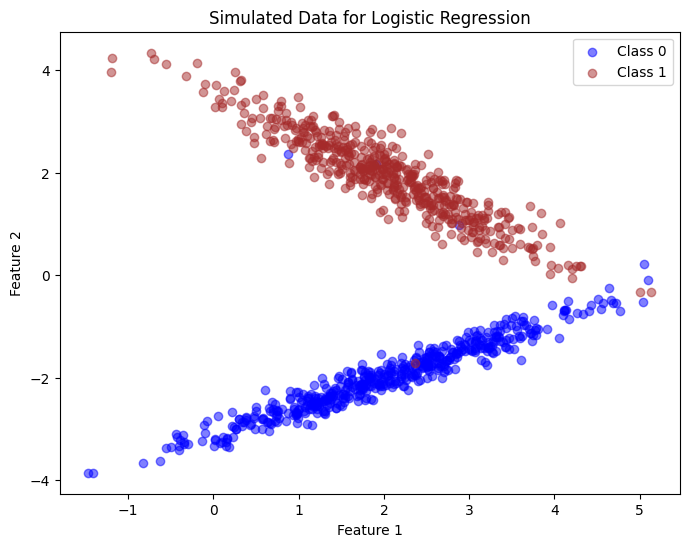

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


# Generate simulated data
simulated_features, simulated_labels = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, flip_y=0.01, class_sep=2.0, random_state=42)

# Plotting the simulated data
plt.figure(figsize=(8, 6))
plt.scatter(simulated_features[simulated_labels == 0][:, 0], simulated_features[simulated_labels == 0][:, 1], color='blue', label='Class 0', alpha=0.5)
plt.scatter(simulated_features[simulated_labels == 1][:, 0], simulated_features[simulated_labels == 1][:, 1], color='brown', label='Class 1', alpha=0.5)
plt.title('Simulated Data for Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [2]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_features, simulated_labels)
print (clf.intercept_, clf.coef_)

[-1.44267173] [[0.45917037 3.78273318]]


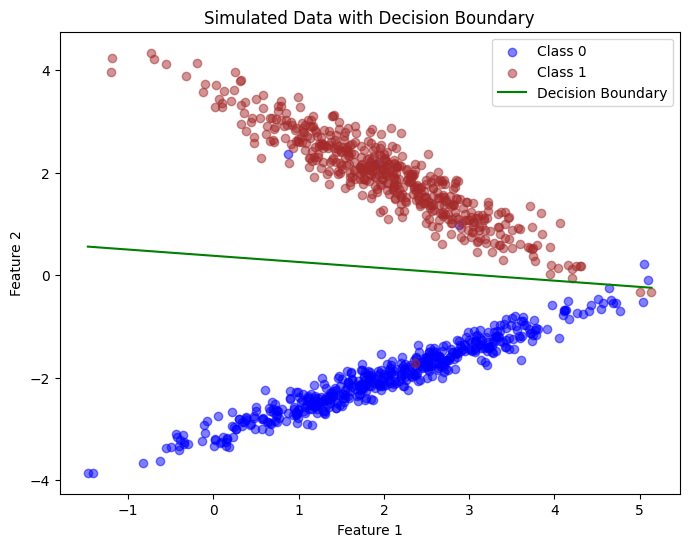

In [3]:
# Plotting the simulated data
plt.figure(figsize=(8, 6))
plt.scatter(simulated_features[simulated_labels == 0][:, 0], simulated_features[simulated_labels == 0][:, 1], color='blue', label='Class 0', alpha=0.5)
plt.scatter(simulated_features[simulated_labels == 1][:, 0], simulated_features[simulated_labels == 1][:, 1], color='brown', label='Class 1', alpha=0.5)

w = clf.coef_[0]
intercept = clf.intercept_[0]
x1_vals = np.linspace(simulated_features[:, 0].min(), simulated_features[:, 0].max(), 100)
x2_vals = -(w[0] * x1_vals + intercept) / w[1]

plt.plot(x1_vals, x2_vals, color='green', label='Decision Boundary')
plt.title('Simulated Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Custom Logistic Regression

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum(target * scores - np.log(1 + np.exp(scores)))
    return ll

def logistic_regression(features, target, iterations, learning_rate):
    features = np.hstack((np.ones((features.shape[0], 1)), features))  # Add intercept
    weights = np.zeros(features.shape[1])
    log_likelihood_values = []

    for step in range(iterations):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        # Saving log-likelihood values every so often for monitoring
        if step % 100 == 0:
            ll = log_likelihood(features, target, weights)
            log_likelihood_values.append(ll)

    return weights, log_likelihood_values

In [5]:
iterations = 3000
learning_rate = 0.01

weights, _ = logistic_regression(simulated_features, simulated_labels, iterations, learning_rate)

print("Trained weights:", weights)

Trained weights: [-1.44262092  0.45915748  3.78272752]


# Learning Rate Experiment

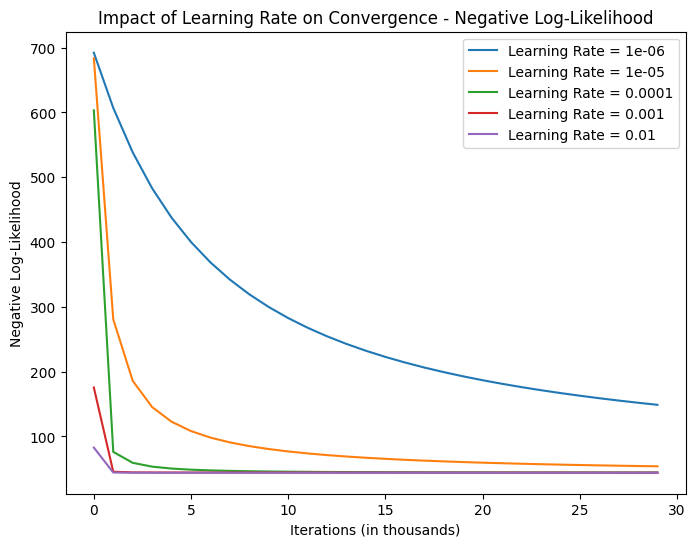

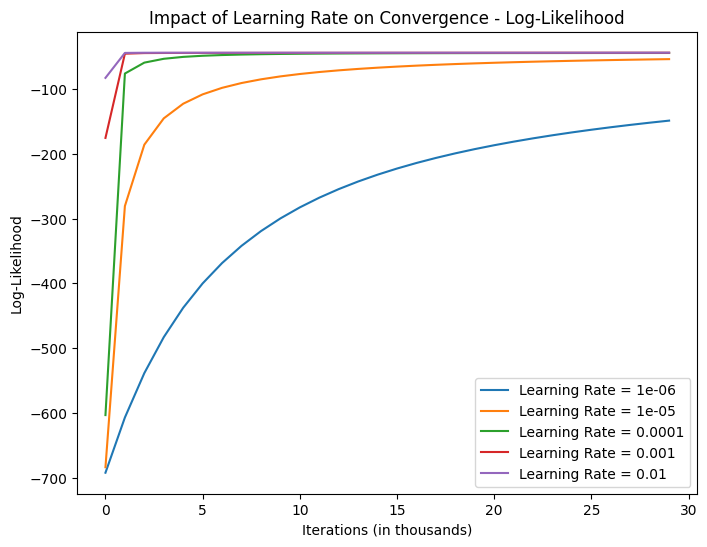

In [6]:
# Different learning rates to test
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 0.01]

# Plot setup
plt.figure(figsize=(8, 6))

# Run logistic regression with different learning rates
for lr in learning_rates:
    _, log_likelihood_values = logistic_regression(simulated_features, simulated_labels, iterations, learning_rate=lr)
    negative_log_likelihood_values = [x * -1 for x in log_likelihood_values]
    plt.plot(negative_log_likelihood_values, label=f'Learning Rate = {lr}')

plt.xlabel('Iterations (in thousands)')
plt.ylabel('Negative Log-Likelihood')
plt.title('Impact of Learning Rate on Convergence - Negative Log-Likelihood')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
# Run logistic regression with different learning rates
for lr in learning_rates:
    _, log_likelihood_values = logistic_regression(simulated_features, simulated_labels, iterations, learning_rate=lr)
    plt.plot(log_likelihood_values, label=f'Learning Rate = {lr}')

plt.xlabel('Iterations (in thousands)')
plt.ylabel('Log-Likelihood')
plt.title('Impact of Learning Rate on Convergence - Log-Likelihood')
plt.legend()
plt.show()

# Simulation Data

In [7]:
def predict(features, weights):
    features = np.hstack((np.ones((features.shape[0], 1)), features))  # Add intercept
    scores = np.dot(features, weights)
    predictions = sigmoid(scores)
    return np.round(predictions)  # Round to 0 or 1

In [8]:
X_train, X_val, y_train, y_val = train_test_split(simulated_features, simulated_labels, test_size=0.3, random_state=22)
weights, _ = logistic_regression(X_train, y_train, iterations, learning_rate)

predictions_train = predict(X_train, weights)
accuracy_train = accuracy_score(y_train, predictions_train)
f1 = f1_score(y_train, predictions_train)
precision = precision_score(y_train, predictions_train)
recall = recall_score(y_train, predictions_train)

print(f" Training Dataset: Accuracy: {accuracy_train:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

predictions_val = predict(X_val, weights)
accuracy_val = accuracy_score(y_val, predictions_val)
f1 = f1_score(y_val, predictions_val)
precision = precision_score(y_val, predictions_val)
recall = recall_score(y_val, predictions_val)

print(f" Validation Dataset: Accuracy: {accuracy_val:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

 Training Dataset: Accuracy: 1.00, F1 Score: 1.00, Precision: 0.99, Recall: 1.00
 Validation Dataset: Accuracy: 0.98, F1 Score: 0.98, Precision: 0.98, Recall: 0.99


# IRIS Data

In [18]:
# Iterate through all unique class pairs
data = load_iris()
X, y = data.data, data.target
class_names = data.target_names
class_combinations = list(itertools.combinations(np.unique(y), 2))

results = []

for (index1, index2) in class_combinations:
    # Select data for the current class pair
    indices = np.where((y == index1) | (y == index2))[0]
    X_pair, y_pair = X[indices], y[indices]
    y_pair = np.where(y_pair == index1, 0, 1)  # Assign binary labels: 0 for class1, 1 for class2
    
    # Optionally, scale the features
    scaler = StandardScaler()
    X_pair_scaled = scaler.fit_transform(X_pair)
    
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_pair_scaled, y_pair, test_size=0.3, random_state=42)
    
    # Train the model on the training set and evaluate
    weights, _ = logistic_regression(X_train, y_train, 3000, 0.01)
    predictions = predict(X_val, weights)
    
    # Calculate metrics
    f1 = f1_score(y_val, predictions)
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    accuracy = accuracy_score(y_val, predictions)
    
    results.append(((class_names[index1], class_names[index2]), accuracy, f1, precision, recall))

    
total_acc, total_f1, total_precision, total_recall = 0, 0, 0, 0
for (class1, class2), acc, f1, precision, recall in results:
    print(f"Classes {class1} vs {class2}: Accuracy: {acc:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")
    total_acc += acc
    total_f1 += f1
    total_precision += precision
    total_recall += recall

avg_acc = total_acc / len(results)
avg_f1 = total_f1 / len(results)
avg_precision = total_precision / len(results)
avg_recall = total_recall / len(results)
print(f"\nAverage Accuracy: {avg_acc:.2f}, Average F1 Score: {avg_f1:.2f}, Average Precision: {avg_precision:.2f}, Average Recall: {avg_recall:.2f}")

Classes setosa vs versicolor: Accuracy: 1.00, F1 Score: 1.00, Precision: 1.00, Recall: 1.00
Classes setosa vs virginica: Accuracy: 1.00, F1 Score: 1.00, Precision: 1.00, Recall: 1.00
Classes versicolor vs virginica: Accuracy: 0.87, F1 Score: 0.85, Precision: 0.85, Recall: 0.85

Average Accuracy: 0.96, Average F1 Score: 0.95, Average Precision: 0.95, Average Recall: 0.95
